<a href="https://colab.research.google.com/github/SeeBee8/Product_Sales_Predictions/blob/main/Sale_Predictions_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Product Sales Predictions**



*Christina Brockway*

##**Goal:**

  - Help the retailer understand the properties of the products
  - Help the retailer understand the properties of the outlets
  - Understand the roles these properties play in sales


##**Plan of Action:**

  - Clean and Inspect the dataset
  - Look at what variables impact sales
  - Develop a strategy for predicting sales of food items based on the stores
  - Find definitive ways to increase sales

##Loading Data





In [12]:
#Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###Import libraries


In [13]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
fpath = '/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv'
df = pd.read_csv(fpath)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [15]:
#make a copy of the dataset
dfcopy = df.copy()

###Inspecting data

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [17]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [18]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [19]:
df.shape

(8523, 12)

*8523 Rows
12 Columns*


*All data types are as they should be*


##Data Cleaning

In [20]:
#Checking for duplicates
duplicate_rows = df.duplicated(keep=False)
duplicate_rows.sum()


0

In [21]:
#Checking for unique values
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [22]:
df.nunique()/len(df) * 100

Item_Identifier              18.291681
Item_Weight                   4.869178
Item_Fat_Content              0.058665
Item_Visibility              92.455708
Item_Type                     0.187727
Item_MRP                     69.670304
Outlet_Identifier             0.117330
Outlet_Establishment_Year     0.105597
Outlet_Size                   0.035199
Outlet_Location_Type          0.035199
Outlet_Type                   0.046932
Item_Outlet_Sales            40.983222
dtype: float64

In [23]:
duplicated_IId = df.duplicated(subset=['Item_Identifier'],keep=False)
duplicated_IId.sum()

8514

In [24]:
df[duplicated_IId].sort_values('Item_Identifier')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
118,DRA12,11.60,Low Fat,0.041178,Soft Drinks,140.3154,OUT017,2007,NaN,Tier 2,Supermarket Type1,2552.6772
7467,DRA12,11.60,Low Fat,0.041113,Soft Drinks,142.0154,OUT018,2009,Medium,Tier 3,Supermarket Type2,850.8924
1693,DRA12,11.60,LF,0.000000,Soft Drinks,141.9154,OUT035,2004,Small,Tier 2,Supermarket Type1,992.7078
1245,DRA12,11.60,Low Fat,0.040912,Soft Drinks,142.3154,OUT013,1987,High,Tier 3,Supermarket Type1,2552.6772
8043,DRA12,11.60,Low Fat,0.068535,Soft Drinks,143.0154,OUT010,1998,NaN,Tier 3,Grocery Store,283.6308
...,...,...,...,...,...,...,...,...,...,...,...,...
2839,NCZ54,14.65,Low Fat,0.083359,Household,161.9552,OUT046,1997,Small,Tier 1,Supermarket Type1,4711.2008
1969,NCZ54,14.65,Low Fat,0.083528,Household,162.4552,OUT045,2002,NaN,Tier 2,Supermarket Type1,2274.3728
214,NCZ54,14.65,Low Fat,0.000000,Household,161.5552,OUT010,1998,NaN,Tier 3,Grocery Store,324.9104
1896,NCZ54,NaN,Low Fat,0.082956,Household,164.0552,OUT027,1985,Medium,Tier 3,Supermarket Type3,5523.4768


*There don't appear to be any duplicated rows or columns*

*The Item_Identifier is not unique to each item*

###Checking for missing values:

In [25]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [26]:
cat_cols = df.select_dtypes('object').columns
cat_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [27]:
#Checking for missing values by category columns
df[cat_cols].isna().sum()

Item_Identifier            0
Item_Fat_Content           0
Item_Type                  0
Outlet_Identifier          0
Outlet_Size             2410
Outlet_Location_Type       0
Outlet_Type                0
dtype: int64

In [28]:
df[cat_cols].isna().sum()/len(df[cat_cols]) * 100

Item_Identifier          0.000000
Item_Fat_Content         0.000000
Item_Type                0.000000
Outlet_Identifier        0.000000
Outlet_Size             28.276428
Outlet_Location_Type     0.000000
Outlet_Type              0.000000
dtype: float64

**Missing Values:**


*   *There are 2410 missing values in the Outlet Size column (28.2%)*

*   *No other column appears to have any missing values in the Categorical datasets*



In [29]:
#Checking for missing columns by numeric columns
numeric_cols = df.select_dtypes('number').columns
numeric_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [30]:
df[numeric_cols].isna().sum()

Item_Weight                  1463
Item_Visibility                 0
Item_MRP                        0
Outlet_Establishment_Year       0
Item_Outlet_Sales               0
dtype: int64

In [31]:
df[numeric_cols].isna().sum()/ len(df[numeric_cols]) * 100


Item_Weight                  17.165317
Item_Visibility               0.000000
Item_MRP                      0.000000
Outlet_Establishment_Year     0.000000
Item_Outlet_Sales             0.000000
dtype: float64

**Missing Values:**


*   *There are 1463 missing values in the Item_Weight column (17.17%)*

*   *No other column appears to have any missing values in the Numerical datasets*

###Address Missing Values

*To deal with missing object values:*

*Use "MISSING' to replace missing values*

**This section of code has been deactivated for ML**

In [32]:
#Replace Nan with 'Missing'
#df[cat_cols] = df[cat_cols].fillna('Missing')
#df[cat_cols].isna().sum()

In [33]:
#Checking missing columns are fixed for category types
df[cat_cols].isna().sum()

Item_Identifier            0
Item_Fat_Content           0
Item_Type                  0
Outlet_Identifier          0
Outlet_Size             2410
Outlet_Location_Type       0
Outlet_Type                0
dtype: int64

*To deal with missing numeric values in the "Item_Weight' column:*

*Use -1 to replace missing values*

**This section of code has been deactivated for ML**

In [34]:
#Replace missing weights with -1
#df['Item_Weight'] = df['Item_Weight'].fillna(-1)

In [35]:
#Check missing values were filled in
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

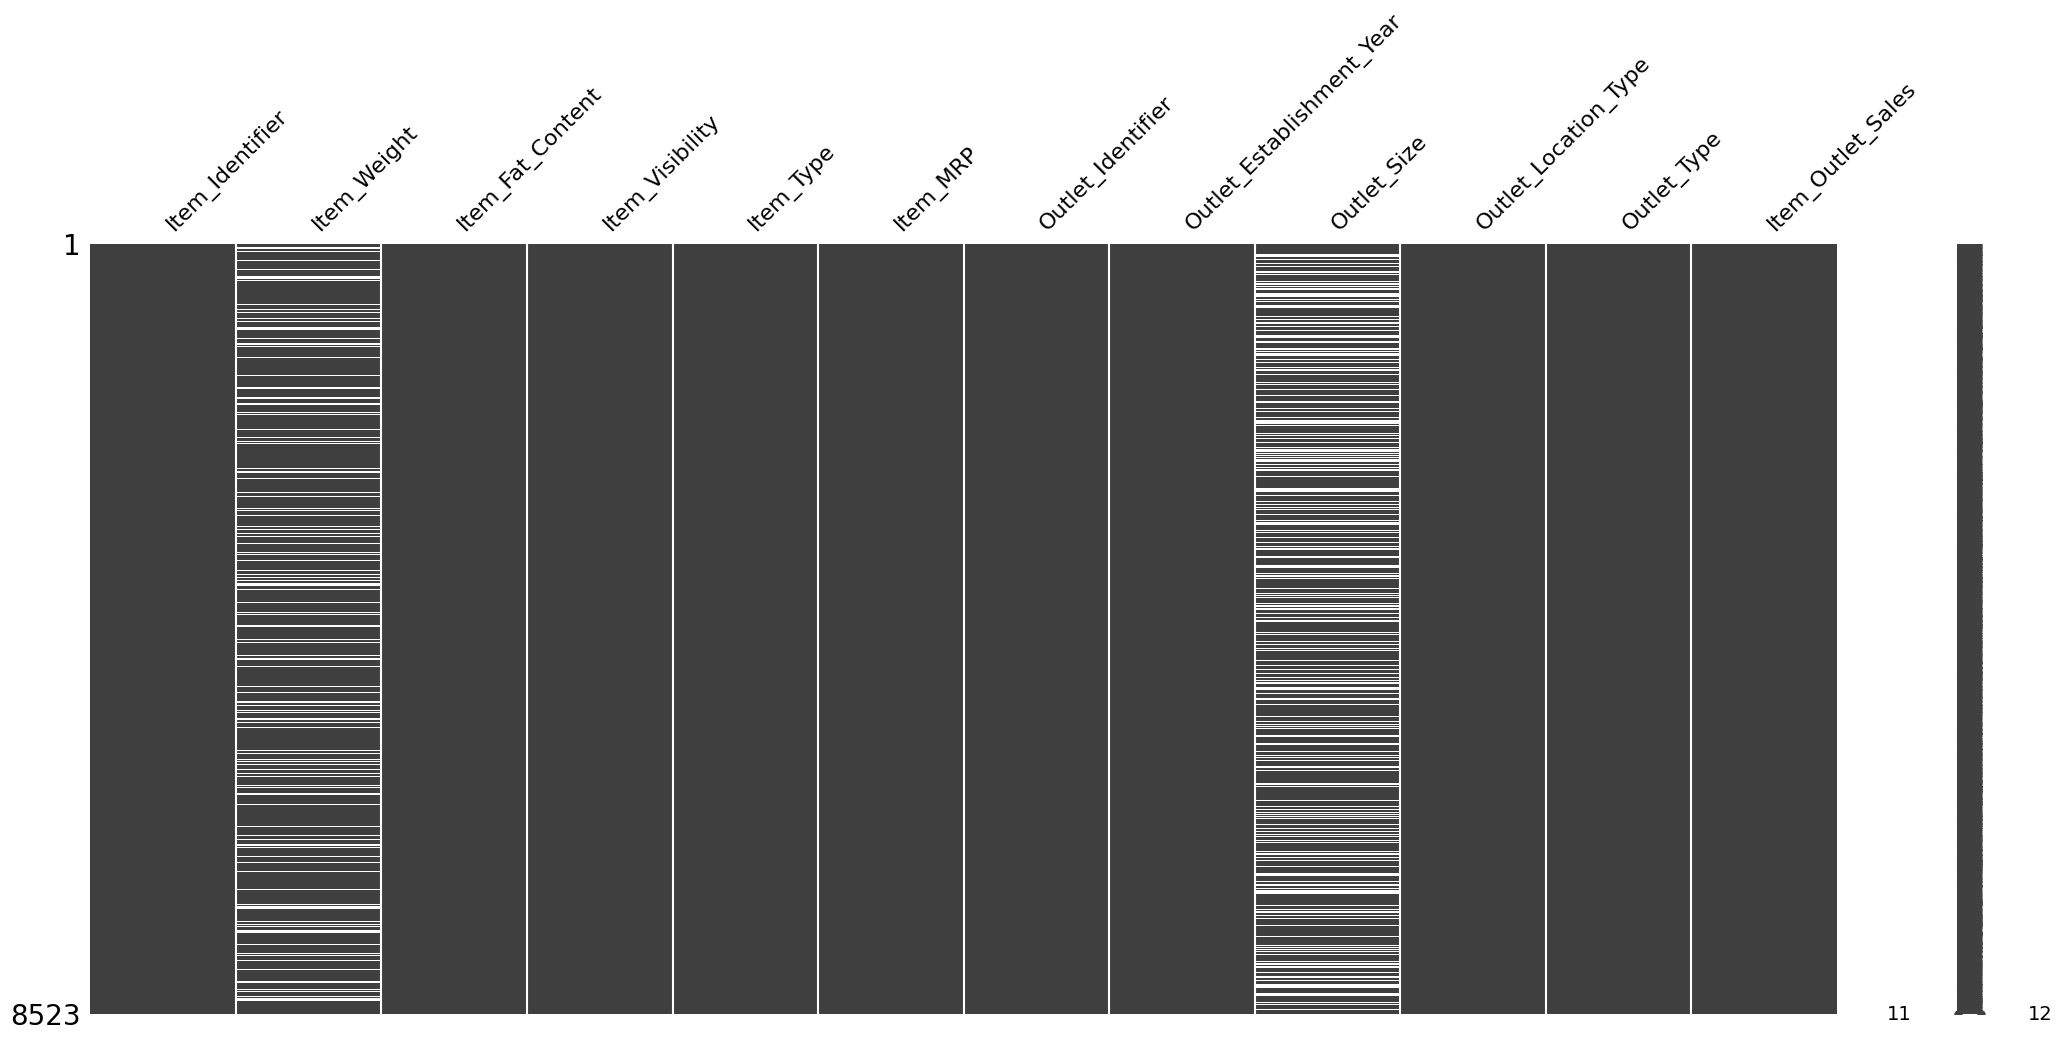

In [36]:
msno.matrix(df);

*It appears all missing values have been fixed* **This section of code has been deactivated for ML**

###Checking for Inconsistencies

In [37]:
#Check for inconsistent values
cat_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [38]:
for col in cat_cols:
  print(f'{col}:')
  print(df[col].value_counts(dropna=False))
  print('\n')

Item_Identifier:
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


Item_Fat_Content:
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Item_Type:
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Outlet_Identifier:
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010  

**The following data was returned for Item_Fat_Content:**

  - Low Fat    5089

  - Regular    2889

  - LF          316

  - reg         117

  - low fat     112


*After reviewing this data set it looks like LF and low fat and Low Fat are the same*.

*Also reg and Regular are the same.*  

LF and low fat will be replaced with Low Fat, and reg will be replaced with Regular

In [39]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')


In [40]:
#Check the change was made
df['Item_Fat_Content'].value_counts(dropna=False)

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [41]:
#Check other numeric features for possible placehoders
#Check summary stats
df.describe().round()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.0,8523.0,8523.0,8523.0,8523.0
mean,13.0,0.0,141.0,1998.0,2181.0
std,5.0,0.0,62.0,8.0,1706.0
min,5.0,0.0,31.0,1985.0,33.0
25%,9.0,0.0,94.0,1987.0,834.0
50%,13.0,0.0,143.0,1999.0,1794.0
75%,17.0,0.0,186.0,2004.0,3101.0
max,21.0,0.0,267.0,2009.0,13087.0


In [42]:
df["Item_Visibility"].describe()

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

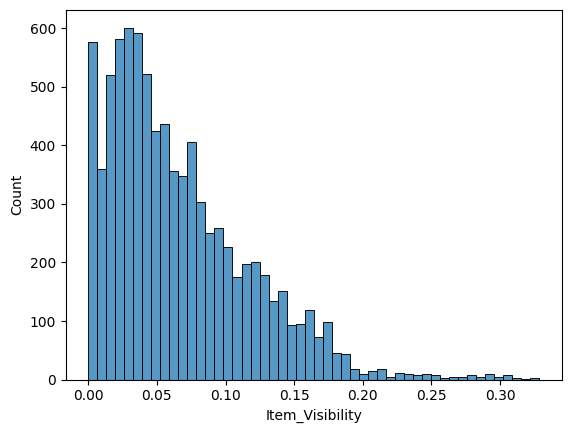

In [43]:
#Inpect Item Visibilty using Seaborn
ax=sns.histplot(data = df, x = 'Item_Visibility')

The column Item_Visibility is all zeros.  On further inspection perhaps showing this column as a percentage would be more useful.


In [44]:
Percent_Visibility = df['Item_Visibility'].map('{:,.2%}'.format)
Percent_Visibility

0        1.60%
1        1.93%
2        1.68%
3        0.00%
4        0.00%
         ...  
8518     5.68%
8519     4.70%
8520     3.52%
8521    14.52%
8522     4.49%
Name: Item_Visibility, Length: 8523, dtype: object

In [45]:
#Add Percent_Visibility column
df['Percent_Visiblity']= Percent_Visibility
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Percent_Visiblity
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,1.60%
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,1.93%
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,1.68%
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,0.00%
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,0.00%


#Save the clean DataFrame

In [46]:
fpath_out = "/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/project1part2.csv"
df.to_csv(fpath_out, index=True)

#Explore the Data

In [47]:
df.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Percent_Visiblity
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,1.60%
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,1.93%
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,1.68%
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,0.00%
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,0.00%


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Percent_Visiblity          8523 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage:

####Use countplots to show the frequency of outlet variables

In [49]:
#Create a DataFrame that includes only the outlet variables
dfoutlets= df[['Outlet_Identifier', 'Outlet_Establishment_Year','Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']]
dfoutlets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Outlet_Identifier          8523 non-null   object
 1   Outlet_Establishment_Year  8523 non-null   int64 
 2   Outlet_Size                6113 non-null   object
 3   Outlet_Location_Type       8523 non-null   object
 4   Outlet_Type                8523 non-null   object
dtypes: int64(1), object(4)
memory usage: 333.1+ KB


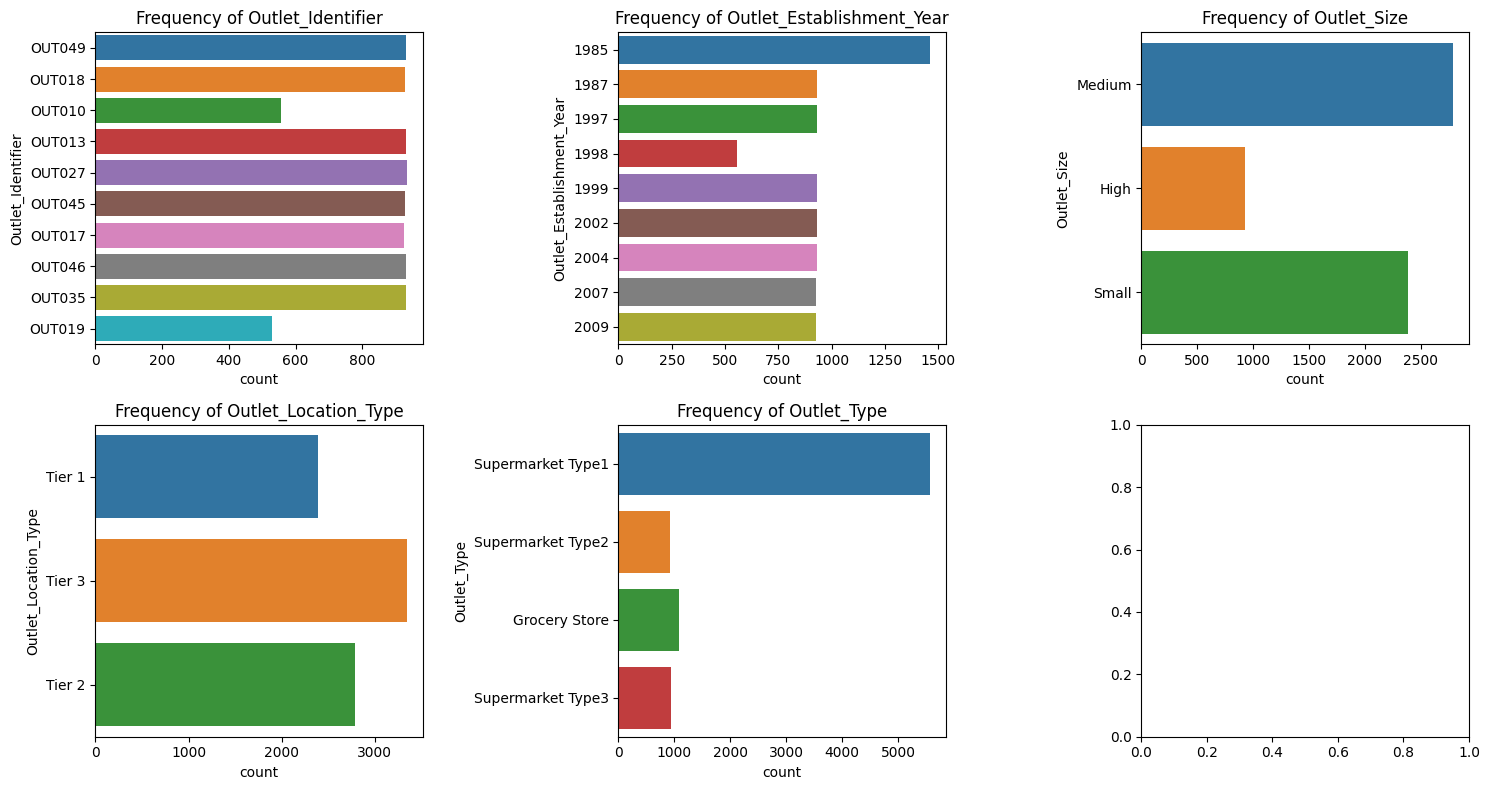

In [50]:
#Make a for loop to show countplots of item variables
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15,8))
plt.subplots_adjust(hspace=0.5)

for col, ax in zip(dfoutlets, axs.ravel()):
  sns.countplot(data = dfoutlets, y= dfoutlets[col], ax=ax)
  ax.set_title(f'Frequency of {col}')

plt.tight_layout()

####**Observations**
*Outlet_Identifier has several variables, they are relatively well represented*

*Outlet_Establishment_Year may be useful in a correlation heatmap*

*For the Outlet_Size variable there are a lot of missing values*

*Outlet_Location_Type may be useful in a mutilvariate visualization*

*There is a huge variation in the number of Outlet_Types*

####Use Histograms to Distribution of numerical features

In [51]:
#Create a dataframe fo
dfnumeric=df[numeric_cols]
dfnumeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                7060 non-null   float64
 1   Item_Visibility            8523 non-null   float64
 2   Item_MRP                   8523 non-null   float64
 3   Outlet_Establishment_Year  8523 non-null   int64  
 4   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 333.1 KB


In [52]:
len(dfnumeric.columns)

5

In [53]:
my_numbers = [1, 2, 3]
my_letters = ['a', 'b', 'c', 'd']

list(zip(my_numbers, my_letters))

[(1, 'a'), (2, 'b'), (3, 'c')]

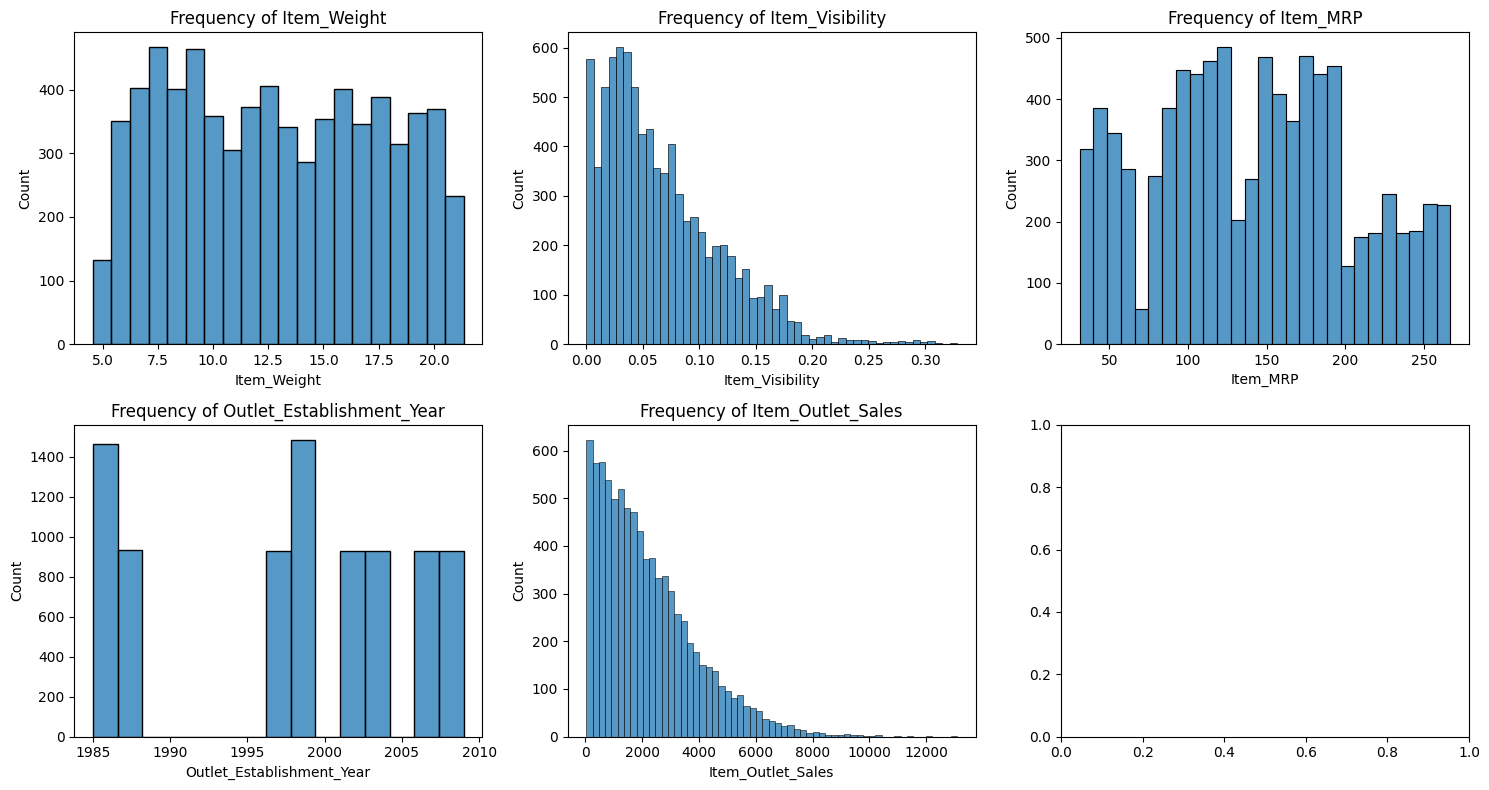

In [54]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15,8))
plt.subplots_adjust(hspace=0.5)

for col, ax in zip(dfnumeric, axs.ravel()):
  sns.histplot(data = dfnumeric, x= dfnumeric[col], ax=ax)
  ax.set_title(f'Frequency of {col}')

plt.tight_layout()

####**Observations**

*Item_Weight are relatively well represented.  There are a whole lot of very light items.*

*The visiblity of items is increased as the number of items goes down.*

*For the Item_MRP variable there is a large sampling of data that seems unrelated to number of items.*

*Histogram of Oulet_Establishment_Year seems useless*

*As the count decreases the Item_Outlet_Sales value increases*

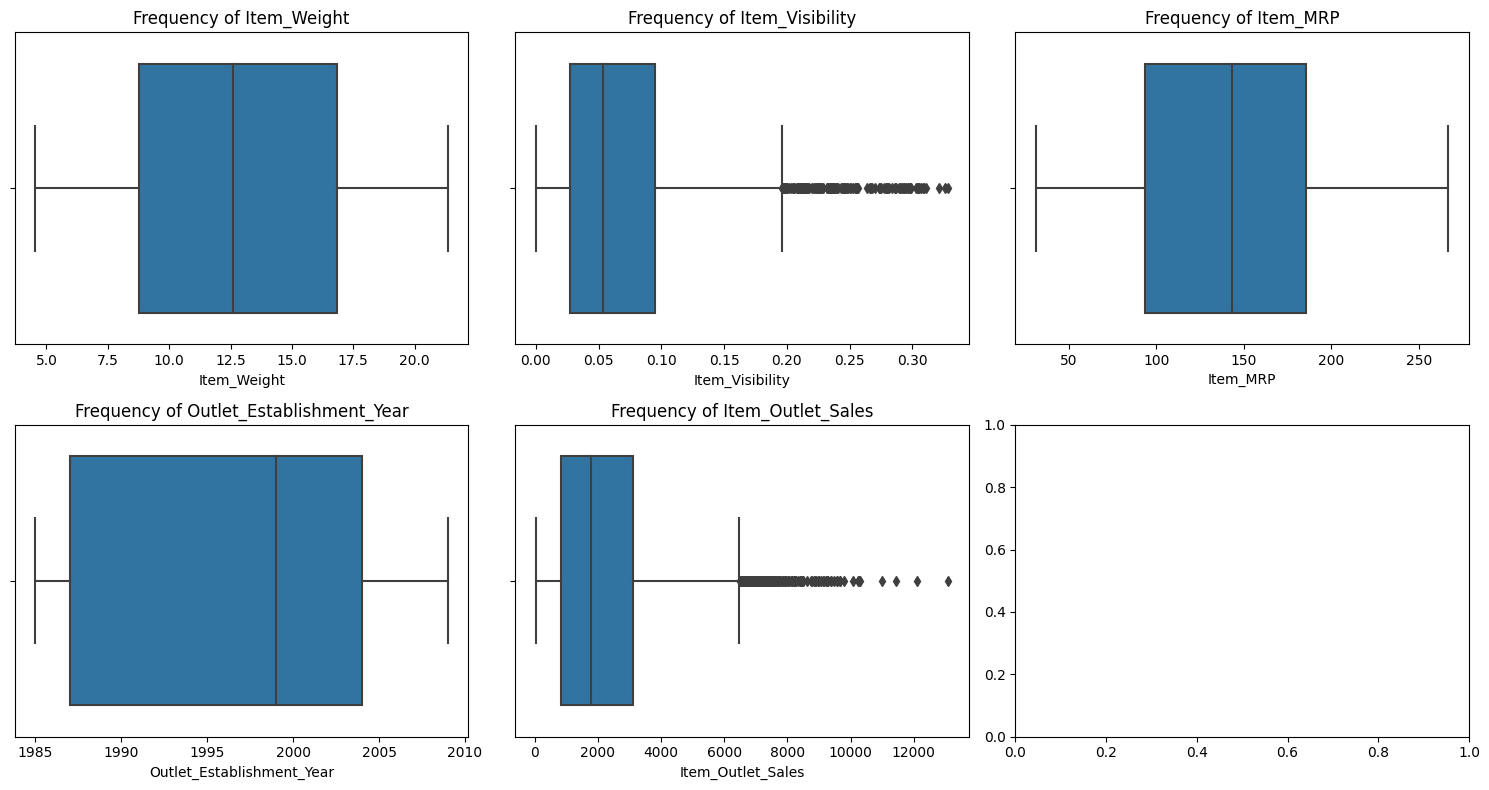

In [55]:
#Make a for loop to show countplots of item variables
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15,8))
plt.subplots_adjust(hspace=0.5)

for col, ax in zip(dfnumeric, axs.ravel()):
  sns.boxplot(data = dfnumeric, x= dfnumeric[col], ax=ax)
  ax.set_title(f'Frequency of {col}')

plt.tight_layout()

####**Observations**

*Item_Weight:  Almost all items lie between 5 and 18 lbs, no visible outliers.*

*Item_Visibility: The visiblity of items is low the majority of the time.  There are several items that don't fall in the box.*

*Item_MRP: All of the items lie between 90 and 190, no visible outliers.*

*Outlet_Establishment_Year seems useless*

*Item-Sales: Most of the values fall between 1000 and 3000.  There are several ouliers.*

###Look at correlations for Item_Outlet_Sales

In [56]:
#Get correlations
corr=df.corr(numeric_only=True)
corr.round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.00,-0.01,0.03,-0.01,0.01
Item_Visibility,-0.01,1.00,-0.00,-0.07,-0.13
Item_MRP,0.03,-0.00,1.00,0.01,0.57
Outlet_Establishment_Year,-0.01,-0.07,0.01,1.00,-0.05
Item_Outlet_Sales,0.01,-0.13,0.57,-0.05,1.00


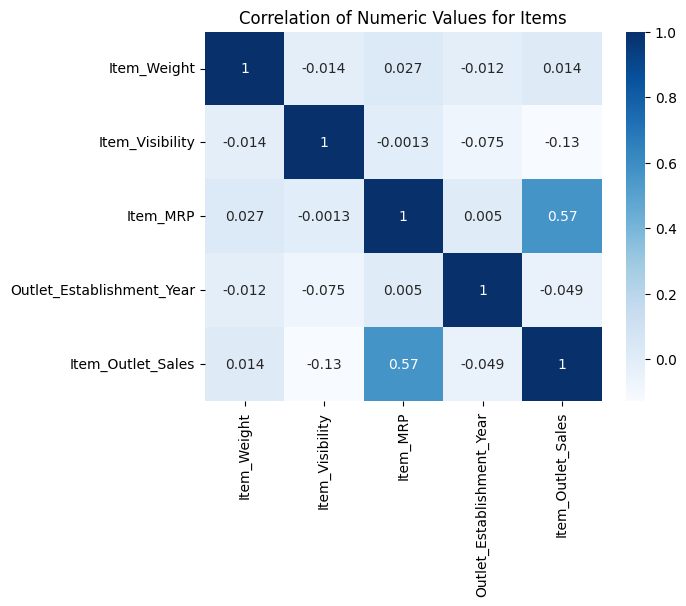

In [57]:
#Use a heat map to visualize correlations
ax= sns.heatmap(corr, cmap='Blues', annot=True);
ax.set_title('Correlation of Numeric Values for Items');

####**Observations:**

*There is a slight positive correlation between Item_MRP and Item_Outlet_Sales*

*There are no other significant correlations in this dataset*

#Exploratory Data Analysis

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Percent_Visiblity          8523 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage:

*There are 13 features*

*8 objects, 1 int, and 4 floats*

###Define functions for **EDA**

In [59]:
#define function for exploring categorical plots

def explore_categorical(df, x, fillna=True, placeholder = 'MISSING', figsize=(6,4), order=None):


#save null value counts and percent
  null_count= dfcopy[x].isna().sum()
  null_perc = null_count/len(dfcopy)*100

  if fillna==True:
    dfcopy[x]=dfcopy[x].fillna(placeholder)
  fig, ax = plt.subplots(figsize=figsize)
  sns.countplot(data=dfcopy, x=x, ax=ax)
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  ax.set_title(f'Column: {x}')

  fig.tight_layout()
  plt.show()

  print(f"-NaN's Found: {null_count}({round(null_perc, 2)}%)")

  nunique= dfcopy[x].nunique()
  print(f'-Unique Values: {nunique}')

  val_counts= dfcopy[x].value_counts(dropna=False)
  most_common_val = val_counts.index[0]
  freq=val_counts.values[0]
  perc_most_common = freq/len(dfcopy)*100
  print(f"-Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  if perc_most_common>98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print('- Not constant or qausi-constant')


  return fig, ax

In [60]:
#Define a function that compares categorical to target
def plot_categorical_vs_target(df, x, y='Item_Outlet_Sales',figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None):
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

    # Barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)

  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)
  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a title
  ax.set_title(f"{x} vs. {y}")
  fig.tight_layout()
  return fig, ax

In [61]:
#Define function for exploring numeric data

def explore_numeric(df, x, figsize=(6,5)):
  gridspec={'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize, sharex=True, gridspec_kw=gridspec)

  #Create histogram
  sns.histplot(data=df, x=x, ax=axes[0])
  #Create boxplot
  sns.boxplot(data=df, x=x, ax=axes[1])

  axes[0].set_title(f'Column: {x}')
  fig.tight_layout()

  #show plot before
  plt.show()

  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)*100
  print(f"-NaN's Found: {null_count}({round(null_perc,2)}%)")


In [62]:
#Define function for multivariate numeric plot vs target
def plot_numeric_vs_target(df,x,y='Item_Outlet_Sales', figsize=(6,4), **kwargs):

  #Calculate correlation
  corr=df[[x,y]].corr().round(2)
  r= corr.loc[x,y]

  #create plots
  fig, ax=plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white', 'lw':1, 'alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws, **kwargs)

  ax.set_title(f'{x} vs {y} (r={r})')

  plt.show()
  return fig, ax

##Explore Catagorical Data

####Item Identifier

*Description: Product ID*

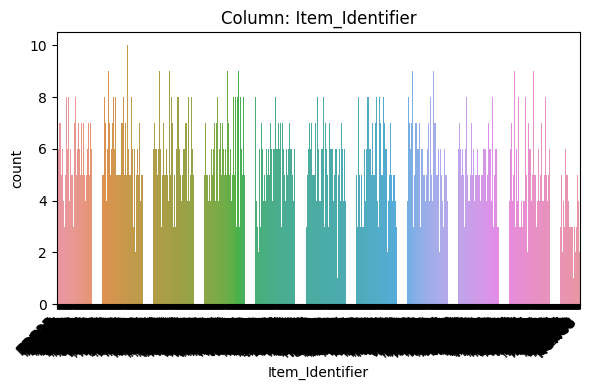

-NaN's Found: 0(0.0%)
-Unique Values: 1559
-Most common value: 'FDW13' occurs 10 times (0.12%)
- Not constant or qausi-constant


In [63]:
explore_categorical(df,"Item_Identifier");


  - **What type of feature is it?** *Categorical*
  - **How many null values?** *0 (0.0%)*
  - **What would you do with the null values?**    *N/A*
  - **Is the feature constant or quasi-constant?**  *Not Constant or quasi-constant*
  - **What is the cardinality? Is it high (>10)?** *Yes*
  - **Would we know this feature before the target is determined?** *Yes*
  - **Is there a business case/understanding reason to exclude based on our business case?** *Yes, there are just too many different values to make this a usable variable.*

####Item Fat Content

*Description: Whether the product is low-fat or regular*

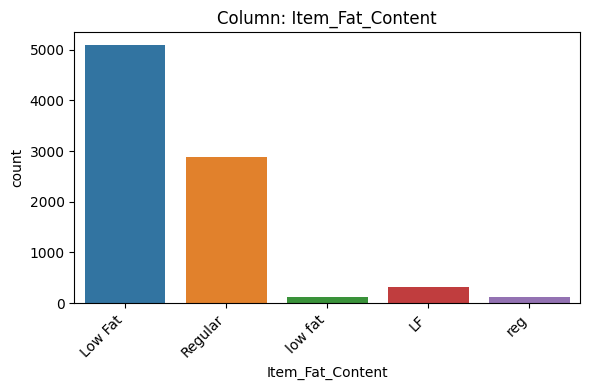

-NaN's Found: 0(0.0%)
-Unique Values: 5
-Most common value: 'Low Fat' occurs 5089 times (59.71%)
- Not constant or qausi-constant


In [64]:
explore_categorical(df,"Item_Fat_Content");

  - **What type of feature is it?** *Categorical*
  - **How many null values?** *0(0.0%)*
  - **What would you do with the null values?**  *N/A*
  - **Is the feature constant or quasi-constant?** *Niether constant or quasi_constant*
  - **What is the cardinality? Is it high (>10)?** *Low cardinality*
  - **Would we know this feature before the target is determined?** *Yes*
  - **Is there a business case/understanding reason to exclude based on our business case?**  *No*

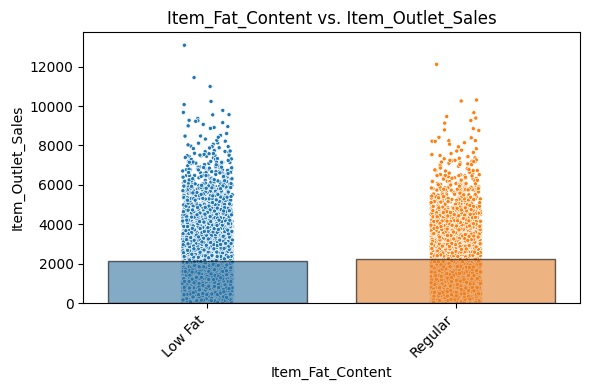

In [65]:
plot_categorical_vs_target(df, "Item_Fat_Content");

  - **Based on your business understanding, would you expect this feature to be a predictor of the target?**  *No*
  - **Does this feature appear to be a predictor of the target?**  *No*

####Item Type

*The category to which the product belongs*

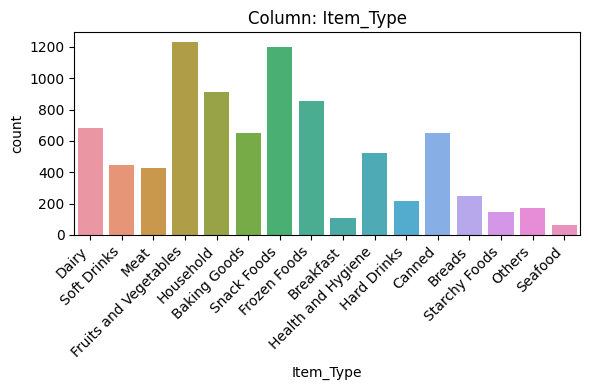

-NaN's Found: 0(0.0%)
-Unique Values: 16
-Most common value: 'Fruits and Vegetables' occurs 1232 times (14.46%)
- Not constant or qausi-constant


In [66]:
explore_categorical(df,"Item_Type");

  - **What type of feature is it?** *Categorical*
  - **How many null values?** *0(0.0%)*
  - **What would you do with the null values?**  *N/A*
  - **Is the feature constant or quasi-constant?** *Niether constant or quasi_constant*
  - **What is the cardinality? Is it high (>10)?** *High cardinality*
  - **Would we know this feature before the target is determined?** *Yes*
  - **Is there a business case/understanding reason to exclude based on our business case?**  *No*

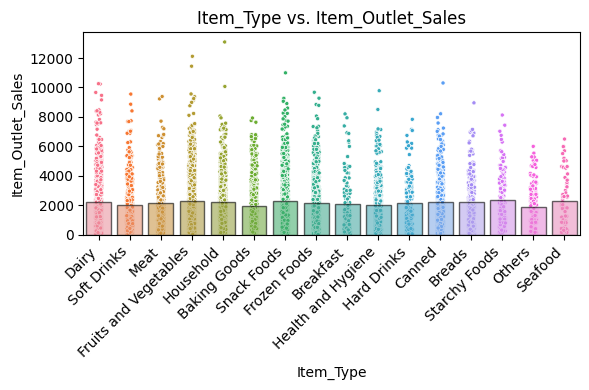

In [67]:
plot_categorical_vs_target(df, 'Item_Type');

  - **Based on your business understanding, would you expect this feature to be a predictor of the target?**  *Possibly*
  - **Does this feature appear to be a predictor of the target?**  *only slightly*



####Outlet Identifier

*Store ID*

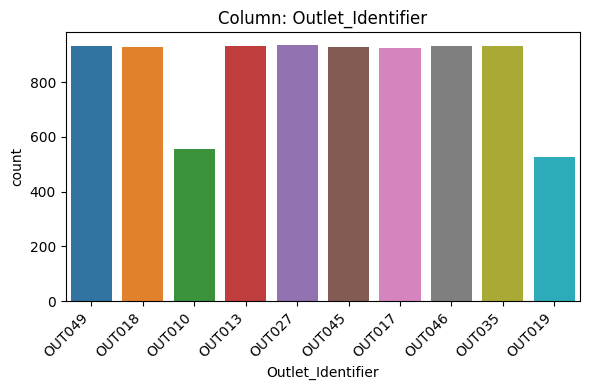

-NaN's Found: 0(0.0%)
-Unique Values: 10
-Most common value: 'OUT027' occurs 935 times (10.97%)
- Not constant or qausi-constant


In [68]:
explore_categorical(df,"Outlet_Identifier");

  - **What type of feature is it?** *Categorical*
  - **How many null values?** *0(0.0%)*
  - **What would you do with the null values?**  *N/A*
  - **Is the feature constant or quasi-constant?** *Niether constant or quasi_constant*
  - **What is the cardinality? Is it high (>10)?** *Moderate cardinality*
  - **Would we know this feature before the target is determined?** *Yes*
  - **Is there a business case/understanding reason to exclude based on our business case?**  *No*

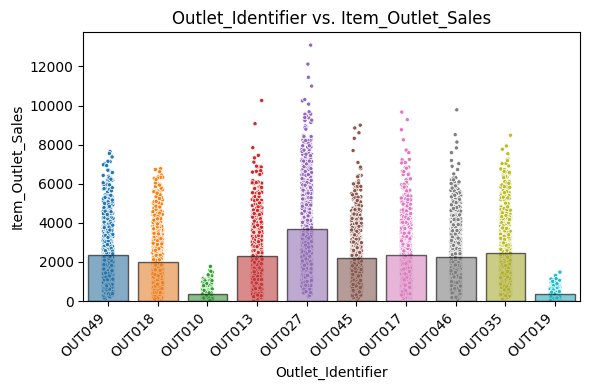

In [69]:
plot_categorical_vs_target(df, 'Outlet_Identifier');

  - **Based on your business understanding, would you expect this feature to be a predictor of the target?**  *Possibly*
  - **Does this feature appear to be a predictor of the target?**  *yes, there are some clear indicators of which outlets do better than others*

####Outlet Size

*The size of the store in terms of ground area covered*

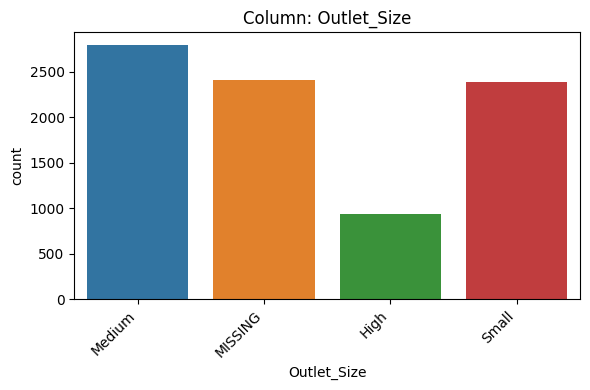

-NaN's Found: 2410(28.28%)
-Unique Values: 4
-Most common value: 'Medium' occurs 2793 times (32.77%)
- Not constant or qausi-constant


In [70]:
explore_categorical(df,"Outlet_Size");

  - **What type of feature is it?** *Categorical*
  - **How many null values?** *2410 (28.28%)*
  - **What would you do with the null values?**  *Consider dropping the column, will inspect the values*
  - **Is the feature constant or quasi-constant?** *Niether constant or quasi_constant*
  - **What is the cardinality? Is it high (>10)?** *Low cardinality*
  - **Would we know this feature before the target is determined?** *Yes*
  - **Is there a business case/understanding reason to exclude based on our business case?**  *No*

*Look at missing values*

In [71]:
#Create a DataFrame focused on Outlet information
df_outlet=df[['Outlet_Size', 'Outlet_Identifier', 'Outlet_Type']]
df_outlet

,Outlet_Size,Outlet_Identifier,Outlet_Type
0,Medium,OUT049,Supermarket Type1
1,Medium,OUT018,Supermarket Type2
2,Medium,OUT049,Supermarket Type1
3,NaN,OUT010,Grocery Store
4,High,OUT013,Supermarket Type1
...,...,...,...
8518,High,OUT013,Supermarket Type1
8519,NaN,OUT045,Supermarket Type1
8520,Small,OUT035,Supermarket Type1
8521,Medium,OUT018,Supermarket Type2


In [72]:
df_outlet.loc[df_outlet['Outlet_Identifier']== 'OUT010']

,Outlet_Size,Outlet_Identifier,Outlet_Type
3,NaN,OUT010,Grocery Store
28,NaN,OUT010,Grocery Store
30,NaN,OUT010,Grocery Store
45,NaN,OUT010,Grocery Store
65,NaN,OUT010,Grocery Store
...,...,...,...
8400,NaN,OUT010,Grocery Store
8432,NaN,OUT010,Grocery Store
8473,NaN,OUT010,Grocery Store
8486,NaN,OUT010,Grocery Store


In [73]:
#make a table showing count of outlet identfiers by size
df_outlet.fillna('MISSING').groupby(['Outlet_Identifier', "Outlet_Size"]).count()

,,Outlet_Type
Outlet_Identifier,Outlet_Size,
OUT010,MISSING,555
OUT013,High,932
OUT017,MISSING,926
OUT018,Medium,928
OUT019,Small,528
OUT027,Medium,935
OUT035,Small,930
OUT045,MISSING,929
OUT046,Small,930


*For specific outlets, based off the identifier, the outlet size is missing and there is not a way to reconcile that value*

*The number of sales for these outlets might be a useful variable, it would need further exploration*

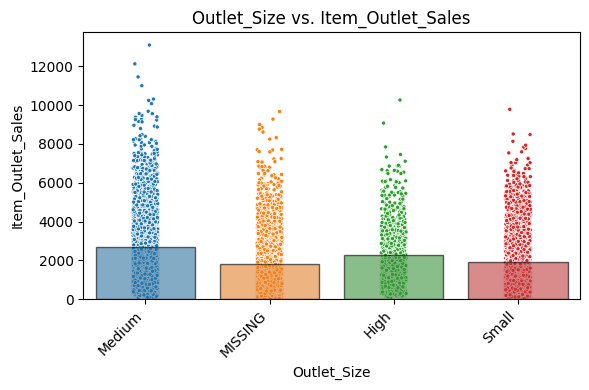

In [74]:
plot_categorical_vs_target(df,'Outlet_Size');

  - **Based on your business understanding, would you expect this feature to be a predictor of the target?**  *Possibly*
  - **Does this feature appear to be a predictor of the target?**  *only slightly*

####Outlet Location Type

*The type of area in which the store is located*

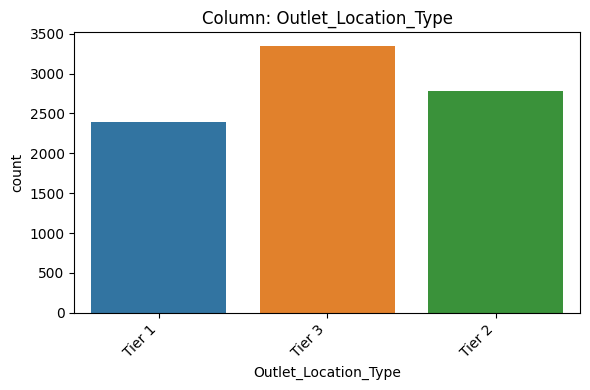

-NaN's Found: 0(0.0%)
-Unique Values: 3
-Most common value: 'Tier 3' occurs 3350 times (39.31%)
- Not constant or qausi-constant


In [75]:
explore_categorical(df,"Outlet_Location_Type");

  - **What type of feature is it?** (Categorical (nominal), ordinal, numeric)
  - **How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)**
  - **Is the feature constant or quasi-constant?**
  - **What is the cardinality? Is it high (>10)?**
  - **Would we know this feature before the target is determined?**
  - **Is there a business case/understanding reason to exclude based on our business case?**

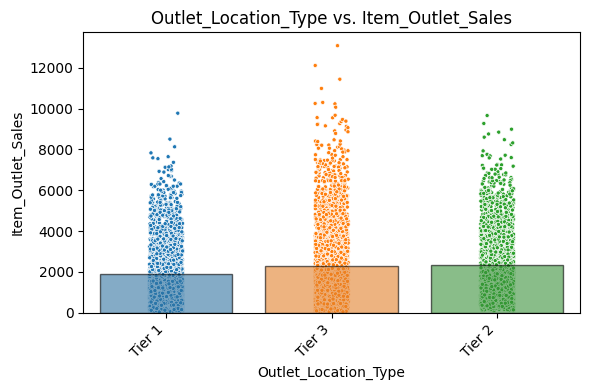

In [76]:
plot_categorical_vs_target(df, 'Outlet_Location_Type');

  - **Based on your business understanding, would you expect this feature to be a predictor of the target?**  *Yes*
  - **Does this feature appear to be a predictor of the target?**  *Yes*

####Outlet Type

*Whether the outlet is a grocery store or some sort of supermarket*

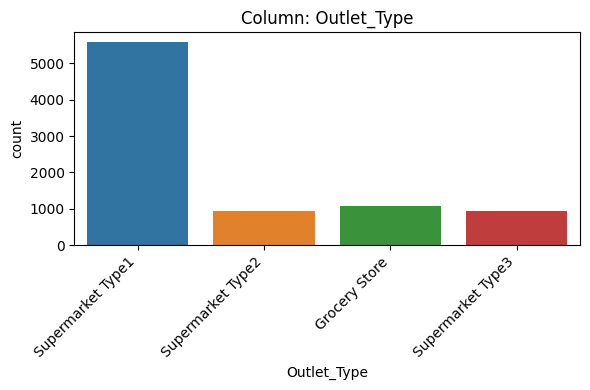

-NaN's Found: 0(0.0%)
-Unique Values: 4
-Most common value: 'Supermarket Type1' occurs 5577 times (65.43%)
- Not constant or qausi-constant


In [77]:
explore_categorical(df,"Outlet_Type");

  - **What type of feature is it?** *Categorical*
  - **How many null values?** *0(0.0%)*
  - **What would you do with the null values?**  *N/A*
  - **Is the feature constant or quasi-constant?** *Niether constant or quasi_constant*
  - **What is the cardinality? Is it high (>10)?** *Moderate cardinality*
  - **Would we know this feature before the target is determined?** *Yes*
  - **Is there a business case/understanding reason to exclude based on our business case?**  *No*

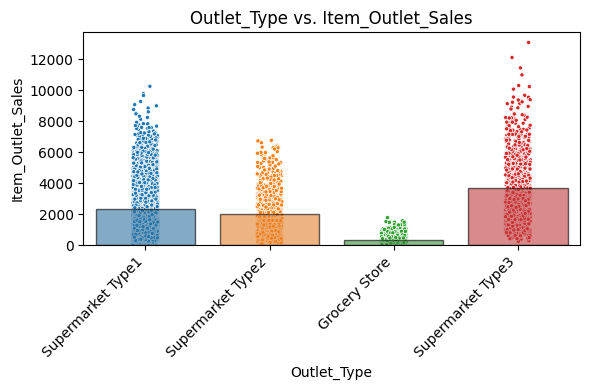

In [78]:
plot_categorical_vs_target(df,'Outlet_Type');

  - **Based on your business understanding, would you expect this feature to be a predictor of the target?**  *Yes*
  - **Does this feature appear to be a predictor of the target?**  *Yes*

##Explore Numeric Data

####Item_Weight

*Weight of product*

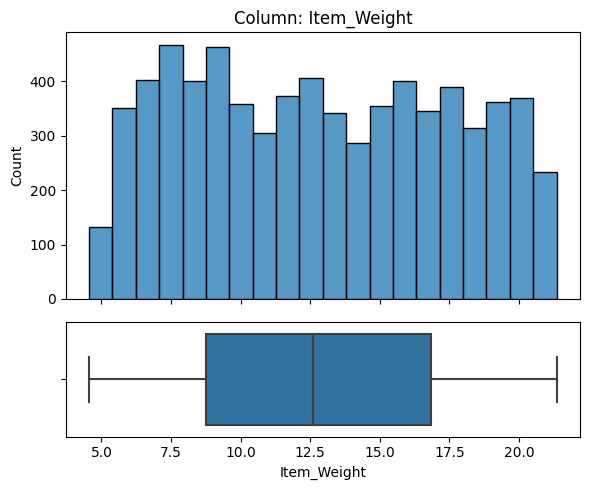

-NaN's Found: 1463(17.17%)


In [79]:
explore_numeric(df, 'Item_Weight')

In [80]:
df['Item_Weight'].value_counts()

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64

- **What type of feature is it?** *Numerical nieither ordinal or nominal*
  - **How many null values?** *1463 (17.17%)*
  - **What would you do with the null values?**  *impute with the mean weight*
  - **Is the feature constant or quasi-constant?** *Niether constant or quasi_constant*
  - **What is the cardinality? Is it high (>10)?** *Low cardinality*
  - **Would we know this feature before the target is determined?** *Yes*
  - **Is there a business case/understanding reason to exclude based on our business case?**  *No*

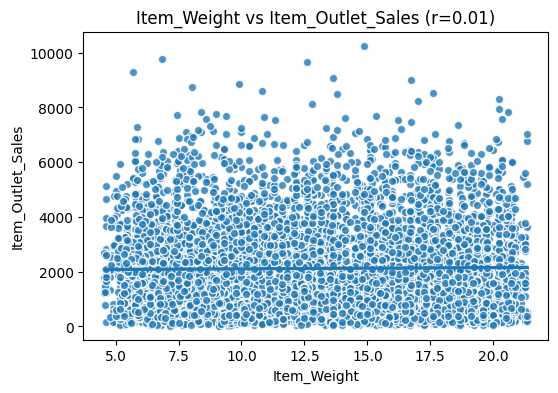

In [81]:
plot_numeric_vs_target(df, 'Item_Weight');

  - **Based on your business understanding, would you expect this feature to be a predictor of the target?**  *No*
  - **Does this feature appear to be a predictor of the target?**  *No*

####Item Visibility

*The percentage of total display area of all proucts in a store allocated to the particular product*

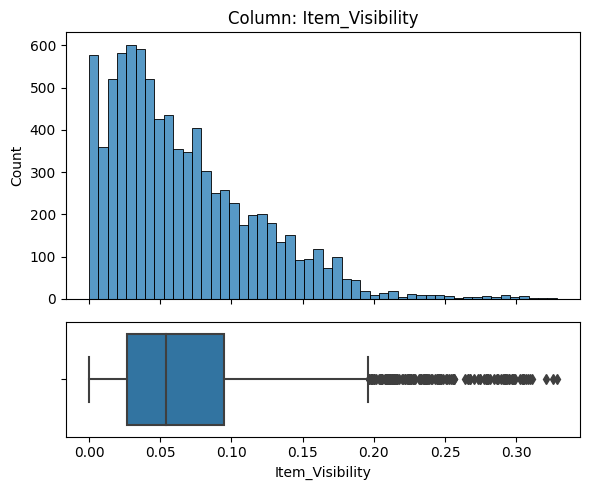

-NaN's Found: 0(0.0%)


In [82]:
explore_numeric(df, 'Item_Visibility')

  - **What type of feature is it?** *Numerical nieither ordinal or nominal*
  - **How many null values?** *0 (0.0%)*
  - **What would you do with the null values?**  *N/A*
  - **Is the feature constant or quasi-constant?** *Niether constant or quasi_constant*
  - **What is the cardinality? Is it high (>10)?** *Moderate cardinality*
  - **Would we know this feature before the target is determined?** *Yes*
  - **Is there a business case/understanding reason to exclude based on our business case?**  *No*

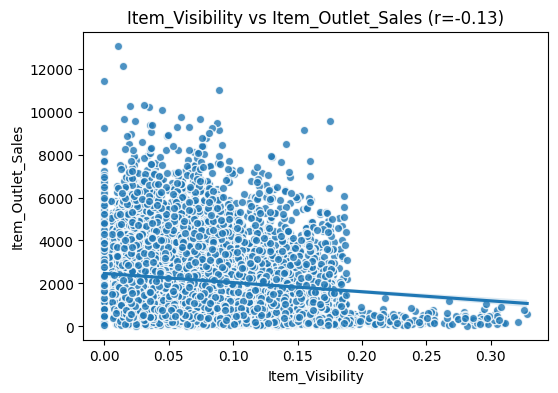

In [83]:
plot_numeric_vs_target(df, 'Item_Visibility');

  - **Based on your business understanding, would you expect this feature to be a predictor of the target?**  *Yes*
  - **Does this feature appear to be a predictor of the target?**  *No*

####Item MRP

*Maximum Retail Price(list price) of the product*

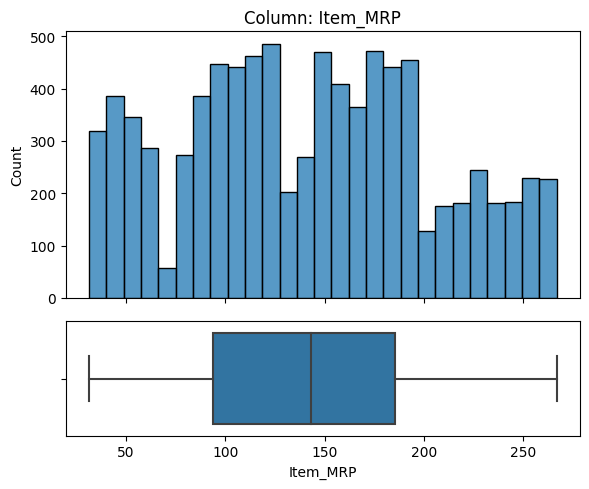

-NaN's Found: 0(0.0%)


In [84]:
explore_numeric(df, "Item_MRP")

  - **What type of feature is it?** *Numerical nieither ordinal or nominal*
  - **How many null values?** *0 (0.0%)*
  - **What would you do with the null values?**  *N/A*
  - **Is the feature constant or quasi-constant?** *Niether constant or quasi_constant*
  - **What is the cardinality? Is it high (>10)?** *Low cardinality*
  - **Would we know this feature before the target is determined?** *Yes*
  - **Is there a business case/understanding reason to exclude based on our business case?**  *No*

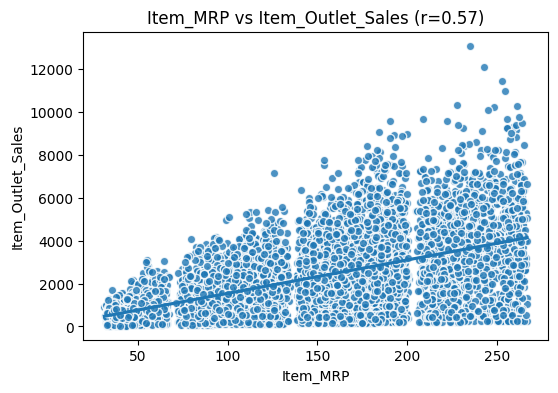

In [85]:
plot_numeric_vs_target(df, "Item_MRP");

  - **Based on your business understanding, would you expect this feature to be a predictor of the target?**  *Yes*
  - **Does this feature appear to be a predictor of the target?**  *Yes*

####Outlet Establishment Year

*The year in which store was established*

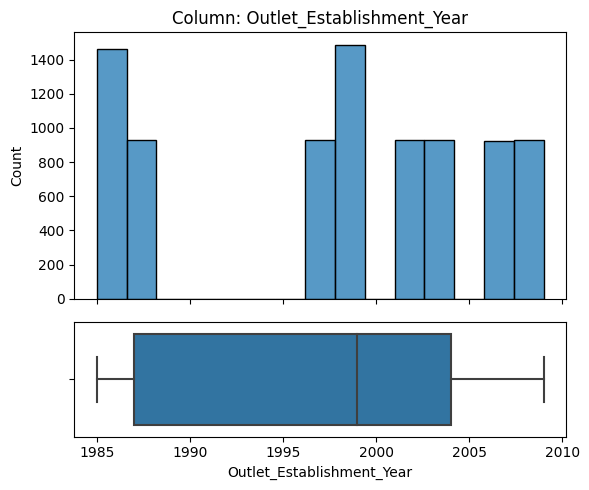

-NaN's Found: 0(0.0%)


In [86]:
explore_numeric(df, 'Outlet_Establishment_Year')

  - **What type of feature is it?** (Categorical (nominal), ordinal, numeric)
  - **How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)**
  - **Is the feature constant or quasi-constant?**
  - **What is the cardinality? Is it high (>10)?**
  - **Would we know this feature before the target is determined?**
  - **Is there a business case/understanding reason to exclude based on our business case?**

####

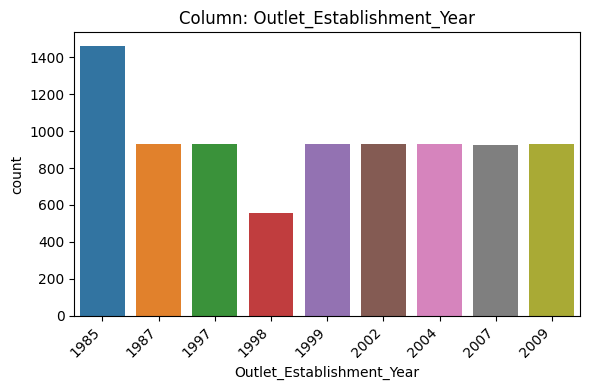

-NaN's Found: 0(0.0%)
-Unique Values: 9
-Most common value: '1985' occurs 1463 times (17.17%)
- Not constant or qausi-constant


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: Outlet_Establishment_Year'}, xlabel='Outlet_Establishment_Year', ylabel='count'>)

In [87]:
explore_categorical(df, 'Outlet_Establishment_Year')

  - **What type of feature is it?** *Numerical nieither ordinal or nominal*
  - **How many null values?** *0 (0.0%)*
  - **What would you do with the null values?**  *N/A*
  - **Is the feature constant or quasi-constant?** *Niether constant or quasi_constant*
  - **What is the cardinality? Is it high (>10)?** *Low cardinality*
  - **Would we know this feature before the target is determined?** *Yes*
  - **Is there a business case/understanding reason to exclude based on our business case?**  *No*

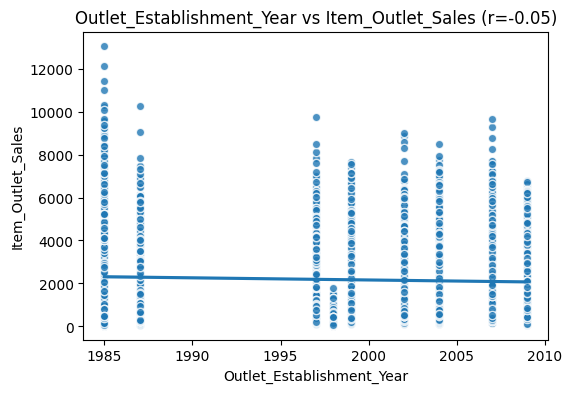

In [88]:
plot_numeric_vs_target(df, 'Outlet_Establishment_Year');

  - **Based on your business understanding, would you expect this feature to be a predictor of the target?**  *No*
  - **Does this feature appear to be a predictor of the target?**  *No*

####Item Outlet Sales

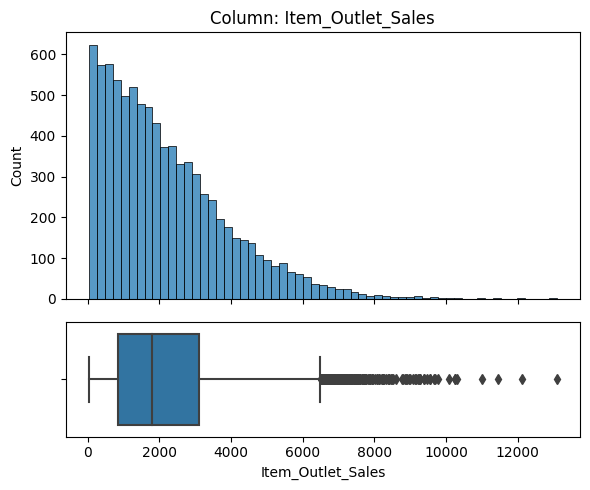

-NaN's Found: 0(0.0%)


In [89]:
explore_numeric(df, "Item_Outlet_Sales");

  - **What type of feature is it?** *Numerical nieither ordinal or nominal*
  - **How many null values?** *0 (0.0%)*
  - **What would you do with the null values?**  *N/A*
  - **Is the feature constant or quasi-constant?** *Niether constant or quasi_constant*
  - **What is the cardinality? Is it high (>10)?** *Low cardinality*
  - **Would we know this feature before the target is determined?** *This is our target*
  - **Is there a business case/understanding reason to exclude based on our business case?**  *This is our target*

#Data For Machine Learning


###Reprocess for Machine Learning

To redo the preprocessing a new dataset needs to be loaded

In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import make_column_selector, ColumnTransformer

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn import set_config
set_config(transform_output='pandas')

In [95]:
fpath2 = '/content/drive/MyDrive/CodingDojo/02-IntroML/Week05/Data/sales_predictions_2023.csv'
df2 = pd.read_csv(fpath2)
df2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [96]:
#Check datatypes
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


**There are 11 features, Target(Item_Outlet_Sales) is an float64**

*7 object, 1 int64, and 4 float64*

*There are 8523 rows and 12 columns*

*Datatypes do not need to be changed*

####Checking for duplicates

In [97]:
df2.duplicated().sum()

0

*There are no duplicates*

####Check for inconsistancies

In [98]:
cat_cols2=df2.select_dtypes('object').columns
cat_cols2

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [99]:
for col in cat_cols2:
  print(f'{col}:')
  print(df2[col].value_counts(dropna=False))
  print('\n')

Item_Identifier:
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


Item_Fat_Content:
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Item_Type:
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Outlet_Identifier:
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010  

Item_Fat_Content: Has inconsistant values

Low Fat    5089 : low fat     112 : LF          316


reg         117 : Regular    2889


In [100]:
df2['Item_Fat_Content'] = df2['Item_Fat_Content'].replace('LF', 'Low Fat')
df2['Item_Fat_Content'] = df2['Item_Fat_Content'].replace('low fat', 'Low Fat')
df2['Item_Fat_Content'] = df2['Item_Fat_Content'].replace('reg', 'Regular')

In [101]:
#Check the change was made
df2['Item_Fat_Content'].value_counts(dropna=False)

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

####Identify Column with High Cardinality

In [102]:
df2.nunique()/len(df2)*100

Item_Identifier              18.291681
Item_Weight                   4.869178
Item_Fat_Content              0.023466
Item_Visibility              92.455708
Item_Type                     0.187727
Item_MRP                     69.670304
Outlet_Identifier             0.117330
Outlet_Establishment_Year     0.105597
Outlet_Size                   0.035199
Outlet_Location_Type          0.035199
Outlet_Type                   0.046932
Item_Outlet_Sales            40.983222
dtype: float64

Item_Itentifier has a high cardinalityn and is not a numeric column.
This column will be dropped

In [103]:
df2=df2.drop(columns='Item_Identifier')


In [104]:
df2.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


####Identify Features and Target

In [105]:
target = 'Item_Outlet_Sales'
y=df2[target]

X=df2.drop(columns=target)

In [106]:
#check attributes
type(y)

pandas.core.series.Series

In [107]:
y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [108]:
type(X)

pandas.core.frame.DataFrame

In [109]:
X.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1


####Train Test Split Data

In [110]:
X_train, X_test, y_train, y_test=train_test_split(X,y, random_state=42)

####Check for missing values

In [111]:
df2.isna().sum()

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Item_Weight is missing 1463 values

Outlet_Size is missing 2410 values

##Create Pipelines for features

**Categorical Columns:**
  - Nominal: Item_Fat_Content, Outlet_Type, Item_type, Outlet_Identifier
  - Ordinal: Outlet_Size, Outlet_Location_Type


Nominal Columns: Item_Fat_Content, Outlet_Type, Item_type, Outlet_Identifier

  - Define the list of features
  - Instantiate Transformer
    --  Impute missing values with "missing" placeholder
    --  OneHotEncoded features
  - Instantiate pipeline

In [112]:
cat_colsX=X_train.select_dtypes('object').columns
cat_colsX= cat_colsX.drop(['Outlet_Size', 'Outlet_Location_Type'])
cat_colsX

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Type'], dtype='object')

In [113]:
#Instantiate the preprocessors

impute_missing= SimpleImputer(strategy='constant', fill_value='MISSING')

#OneHotEncoder
ohe_encoder= OneHotEncoder(sparse_output=False, handle_unknown='ignore')
#Scale data
scaler=StandardScaler()

#Pipeline
cat_pipeline = make_pipeline(impute_missing, ohe_encoder, scaler)
cat_pipeline



Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='MISSING', strategy='constant')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False)),
                ('standardscaler', StandardScaler())])

Ordinal Columns:  Outlet_Size, Outlet_Type

  - Define the list of features
  - Instantiate Transformer
    --  Impute missing values with "NA"
    --  Ordinal Encoded
  - Instantiate pipeline

In [114]:
#Define Ordinal Columns
ord_cols = ['Outlet_Size', 'Outlet_Location_Type']
ord_cols

['Outlet_Size', 'Outlet_Location_Type']

In [115]:
#Instantiate Transformers

#Impute missing values
impute_ord= SimpleImputer(strategy='constant', fill_value='NA')

#Make ordinal encoder
#Specify order of categories
size_order=['NA', 'Small', 'Medium', 'High']
type_order=['NA', 'Tier 1', 'Tier 2', 'Tier 3']
#Make a list of order lists
ord_orders =[size_order, type_order]
#OrdinalEncoder
ord_encoder= OrdinalEncoder(categories=ord_orders)

#StandardScaler
scaler_ord = StandardScaler()


ord_pipeline= make_pipeline(impute_ord, ord_encoder, scaler_ord)
ord_pipeline

Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='NA', strategy='constant')),
                ('ordinalencoder',
                 OrdinalEncoder(categories=[['NA', 'Small', 'Medium', 'High'],
                                            ['NA', 'Tier 1', 'Tier 2',
                                             'Tier 3']])),
                ('standardscaler', StandardScaler())])

**Numeric Columns:**

Item_Weight, Item_Visibility, Item_MRP, Outlet_Establishment_Year

  - Define the list of features
  - Instantiate Transformer
    -- Impute missing values with "most_frequent"
    -- Ordinal Encoded
    -- Scale using StandardScaler
  - Instantiate pipeline

In [116]:
#Define number cols
num_cols=X_train.select_dtypes('number').columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')

In [117]:
#Instantiate Transformers

#Impute with most_frequent
impute_num=SimpleImputer(strategy='most_frequent')

#Scale data
scaler=StandardScaler()

#Pipeline
num_pipeline = make_pipeline(impute_num, scaler)
num_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('standardscaler', StandardScaler())])

####Make Tuples

In [118]:
#make tupels for transformer
cat_tuple= ('object', cat_pipeline, cat_colsX)
cat_tuple

('object',
 Pipeline(steps=[('simpleimputer',
                  SimpleImputer(fill_value='MISSING', strategy='constant')),
                 ('onehotencoder',
                  OneHotEncoder(handle_unknown='ignore', sparse_output=False)),
                 ('standardscaler', StandardScaler())]),
 Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Type'], dtype='object'))

In [119]:
ord_tuple = ('ordinal', ord_pipeline, ord_cols)
ord_tuple

('ordinal',
 Pipeline(steps=[('simpleimputer',
                  SimpleImputer(fill_value='NA', strategy='constant')),
                 ('ordinalencoder',
                  OrdinalEncoder(categories=[['NA', 'Small', 'Medium', 'High'],
                                             ['NA', 'Tier 1', 'Tier 2',
                                              'Tier 3']])),
                 ('standardscaler', StandardScaler())]),
 ['Outlet_Size', 'Outlet_Location_Type'])

In [120]:
num_tuple = ('number', num_pipeline, num_cols)
num_tuple

('number',
 Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                 ('standardscaler', StandardScaler())]),
 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
        'Outlet_Establishment_Year'],
       dtype='object'))

###Column Transformer

In [121]:
#Instantiate ColumnTransformer
preprocessor= ColumnTransformer([cat_tuple, ord_tuple, num_tuple],
                                verbose_feature_names_out=False)

In [122]:
#fit on training data
preprocessor.fit(X_train)


ColumnTransformer(transformers=[('object',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False)),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Type'], dtype='object')),
                                ('ordinal',
                                 Pi...
                                                                              'Tier '
                                                                              '2',
                                                                              'Tier '
                                                                              '3']])),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Outlet_Size', 'Outlet_Location_Type']),
                                ('number',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object'))],
                  verbose_feature_names_out=False)

In [123]:
#Transform training data
X_train_processed = preprocessor.transform(X_train)
#Transform testing data
X_test_processed = preprocessor.transform(X_test)


In [124]:
#confirm transformation
X_train_processed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6392 entries, 4776 to 7270
Data columns (total 38 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Fat_Content_Low Fat         6392 non-null   float64
 1   Item_Fat_Content_Regular         6392 non-null   float64
 2   Item_Type_Baking Goods           6392 non-null   float64
 3   Item_Type_Breads                 6392 non-null   float64
 4   Item_Type_Breakfast              6392 non-null   float64
 5   Item_Type_Canned                 6392 non-null   float64
 6   Item_Type_Dairy                  6392 non-null   float64
 7   Item_Type_Frozen Foods           6392 non-null   float64
 8   Item_Type_Fruits and Vegetables  6392 non-null   float64
 9   Item_Type_Hard Drinks            6392 non-null   float64
 10  Item_Type_Health and Hygiene     6392 non-null   float64
 11  Item_Type_Household              6392 non-null   float64
 12  Item_Type_Meat   

In [125]:
X_train_processed.describe()

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Size,Outlet_Location_Type,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,6.392000e+03,6.392000e+03,6.392000e+03,6.392000e+03,6.392000e+03,6.392000e+03,6.392000e+03,6.392000e+03,6.392000e+03,6.392000e+03,...,6.392000e+03,6.392000e+03,6.392000e+03,6.392000e+03,6.392000e+03,6.392000e+03,6.392000e+03,6.392000e+03,6.392000e+03,6.392000e+03
mean,9.115223e-17,3.334838e-18,2.223225e-17,5.502482e-17,1.333935e-17,-2.695660e-17,4.585402e-17,1.222774e-17,1.445096e-17,-5.780385e-17,...,-3.112515e-17,-1.022684e-16,2.000903e-17,-4.224128e-17,4.779934e-17,3.056934e-17,-4.124083e-16,-6.169450e-17,4.668773e-17,-4.250806e-15
std,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00,...,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00
min,-1.350766e+00,-7.403206e-01,-2.842977e-01,-1.677755e-01,-1.153968e-01,-2.852608e-01,-2.935153e-01,-3.312434e-01,-4.172969e-01,-1.647948e-01,...,-3.779645e-01,-1.368035e+00,-3.518087e-01,-3.571214e-01,-1.276865e+00,-1.384777e+00,-1.944964e+00,-1.291052e+00,-1.767529e+00,-1.532139e+00
25%,-1.350766e+00,-7.403206e-01,-2.842977e-01,-1.677755e-01,-1.153968e-01,-2.852608e-01,-2.935153e-01,-3.312434e-01,-4.172969e-01,-1.647948e-01,...,-3.779645e-01,-1.368035e+00,-3.518087e-01,-3.571214e-01,-1.276865e+00,-1.384777e+00,-7.747382e-01,-7.624234e-01,-7.638272e-01,-1.293807e+00
50%,7.403206e-01,-7.403206e-01,-2.842977e-01,-1.677755e-01,-1.153968e-01,-2.852608e-01,-2.935153e-01,-3.312434e-01,-4.172969e-01,-1.647948e-01,...,-3.779645e-01,7.309757e-01,-3.518087e-01,-3.571214e-01,-2.643701e-01,-1.499144e-01,-1.476204e-01,-2.318711e-01,3.400912e-02,1.361872e-01
75%,7.403206e-01,1.350766e+00,-2.842977e-01,-1.677755e-01,-1.153968e-01,-2.852608e-01,-2.935153e-01,-3.312434e-01,-4.172969e-01,-1.647948e-01,...,-3.779645e-01,7.309757e-01,-3.518087e-01,-3.571214e-01,7.481247e-01,1.084948e+00,7.871400e-01,5.596016e-01,7.172910e-01,7.320181e-01
max,7.403206e-01,1.350766e+00,3.517440e+00,5.960345e+00,8.665751e+00,3.505564e+00,3.406977e+00,3.018928e+00,2.396376e+00,6.068153e+00,...,2.645751e+00,7.309757e-01,2.842454e+00,2.800168e+00,1.760619e+00,1.084948e+00,2.029543e+00,5.132050e+00,1.994559e+00,1.327849e+00


#Models

Build a Linear Regression Model to predict Sales
- Bulid a linear Regression model
- Use custom function to get metrics
- Compare the training vs testing data R-squared values


In [126]:
#Add custom function
def regression_metrics (reg, X_, y_test, label='Test Data'):

  #get predeictions
  y_pred = reg.predict(X_test)

  # Get metrics
  mae = mean_absolute_error(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred)
  rmse = mean_squared_error(y_test, y_pred, squared=False)
  r_squared = r2_score(y_test, y_pred)


def evaluate_regression(pipe, X_train, y_train, X_test, y_test,
                       model_name='Regression Model'):

  """Takes a regression model, training features and target and testing features and target.
  Returns a dataframe of regression metrics"""

  ## Predictions
  train_pred = pipe.predict(X_train)
  test_preds = pipe.predict(X_test)

  metrics = ['train_MAE','test_MAE',
             'train_RMSE', 'test_RMSE',
             'train_R2', 'test_R2']

  ## Train
  train_mae = round(mean_absolute_error(y_train, train_pred),4)
  train_rmse = round(np.sqrt(mean_squared_error(y_train, train_pred)),4)
  train_r2 = round(r2_score(y_train, train_pred),4)

  ## Test
  test_mae = round(mean_absolute_error(y_test, test_preds),4)
  test_rmse = round(np.sqrt(mean_squared_error(y_test, test_preds)),4)
  test_r2 = round(r2_score(y_test, test_preds),4)

  ## Output Dataframe
  scores = pd.DataFrame(columns=metrics, index=[model_name])
  scores.loc[model_name, :] = [train_mae, test_mae,
                              train_rmse, test_rmse,
                              train_r2, test_r2]

  return scores

In [127]:
#Create a Baseline Model
## Create an instance of the model
dummy = DummyRegressor(strategy='mean')
## Create a model pipeline
dummy_pipe = make_pipeline(preprocessor, dummy)
## Fit the model
dummy_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('object',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='MISSING',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_...
                                                                   StandardScaler())]),
                                                  ['Outlet_Size',
                                                   'Outlet_Location_Type']),
                                                 ('number',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('dummyregressor', DummyRegressor())])

In [128]:
#Display model's metrics
scores_df = evaluate_regression(dummy_pipe, X_train, y_train,
                                X_test, y_test,
                                model_name="Dummy Model")
display(scores_df)

,train_MAE,test_MAE,train_RMSE,test_RMSE,train_R2,test_R2
Dummy Model,1360.2184,1326.121,1720.3069,1664.9758,0.0,-0.0048


In [129]:
#Build a linear regression model
lin_reg = LinearRegression()
#Make pipeline
lin_reg_pipe = make_pipeline(preprocessor, lin_reg)
#Fit the Model on Training data
lin_reg_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('object',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='MISSING',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_...
                                                                   StandardScaler())]),
                                                  ['Outlet_Size',
                                                   'Outlet_Location_Type']),
                                                 ('number',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('linearregression', LinearRegression())])

In [130]:
scores_lr = evaluate_regression(lin_reg_pipe, X_train, y_train,
                                X_test, y_test,
                                model_name="Linear Regression Model")
scores_df = pd.concat([scores_df, scores_lr])
display(scores_df)

,train_MAE,test_MAE,train_RMSE,test_RMSE,train_R2,test_R2
Dummy Model,1360.2184,1326.121,1720.3069,1664.9758,0.0,-0.0048
Linear Regression Model,848.4193,804.1734,1141.2897,1092.0271,0.5599,0.5678


**To what extent is the model overfit/underfit?**

*The model is very overfit meaning it has a high variance.*

Build a Random Forest model to predict sales:

- Build a default Random forest model
- Use the custom eval function to get metrics
- Compare training and testing R-squared values
- Compare this model's performance to the LR model

In [131]:
#Build a RandomForest model
rf = RandomForestRegressor(random_state=42)
#Make pipeline
rf_pipe = make_pipeline(preprocessor, rf)
#Fit the Model on Training data
rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('object',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='MISSING',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_...
                                                  ['Outlet_Size',
                                                   'Outlet_Location_Type']),
                                                 ('number',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [132]:
scores_rf= evaluate_regression(rf_pipe, X_train,
                               y_train, X_test, y_test,
                               model_name='Random Forest Model')
display(scores_rf)

,train_MAE,test_MAE,train_RMSE,test_RMSE,train_R2,test_R2
Random Forest Model,295.8392,767.0016,426.8837,1103.3364,0.9384,0.5588


In [133]:
scores_df = pd.concat([scores_df, scores_rf])
display(scores_df)

,train_MAE,test_MAE,train_RMSE,test_RMSE,train_R2,test_R2
Dummy Model,1360.2184,1326.121,1720.3069,1664.9758,0.0,-0.0048
Linear Regression Model,848.4193,804.1734,1141.2897,1092.0271,0.5599,0.5678
Random Forest Model,295.8392,767.0016,426.8837,1103.3364,0.9384,0.5588


**To what extent is the model overfit/underfit?**

*The model is very underfit meaning it has a high bias.*

**Compare this model's performance to the linear regression model: which model has the best test scores?**

*The RandomForest model does better only because it gets closer an the actual predictive value, overall.*

Use GridSearch CV to tune at least 2 hyperparameters for a RandomForest model

- After determining the best parameters, fit and evaluate a final best model
- Compare the tuned model to default model

In [134]:
rf_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('object',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(fill_value='MISSING',
                                                                   strategy='constant')),
                                                    ('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   sparse_output=False)),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Type'], dtype='object')),
                                   ('ordinal',
                                    Pi...
                                      

In [135]:
# Define param grid with options to try
params = {'randomforestregressor__max_depth': [None,10,15,20],
          'randomforestregressor__n_estimators':[10,100,150,200],
          'randomforestregressor__oob_score':[True,False],}

In [136]:
GridSearchCV,
#Instantiate GridSearchCV
gridsearch = GridSearchCV(rf_pipe, params, n_jobs=-1, cv = 3, verbose=1)
#Fit the gridsearch on training data
gridsearch.fit(X_train, y_train)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('object',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(fill_value='MISSING',
                                                                                                        strategy='constant')),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False)),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         Index(['Item_Fat_Content', 'Item_Type',...
                                                                         Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__max_depth': [None, 10, 15, 20],
                         'randomforestregressor__n_estimators': [10, 100, 150,
                                                                 200],
                         'randomforestregressor__oob_score': [True, False]},
             verbose=1)

In [137]:
scores_gs= evaluate_regression(gridsearch, X_train,
                               y_train, X_test, y_test,
                               model_name='GridSearch')
display(scores_gs)

,train_MAE,test_MAE,train_RMSE,test_RMSE,train_R2,test_R2
GridSearch,642.5075,737.4644,907.3997,1062.1432,0.7218,0.5911


In [138]:
#Obtain best parameters
gridsearch.best_params_

{'randomforestregressor__max_depth': 10,
 'randomforestregressor__n_estimators': 100,
 'randomforestregressor__oob_score': True}

In [139]:
best_gs = gridsearch.best_estimator_


scores_df = pd.concat([scores_df, scores_gs])
display(scores_df)

,train_MAE,test_MAE,train_RMSE,test_RMSE,train_R2,test_R2
Dummy Model,1360.2184,1326.121,1720.3069,1664.9758,0.0,-0.0048
Linear Regression Model,848.4193,804.1734,1141.2897,1092.0271,0.5599,0.5678
Random Forest Model,295.8392,767.0016,426.8837,1103.3364,0.9384,0.5588
GridSearch,642.5075,737.4644,907.3997,1062.1432,0.7218,0.5911


In [144]:

def evaluate_regression2(pipe, X_train, y_train, X_test, y_test,
                       model_name='Regression Model'):

  """Takes a regression model, training features and target and testing features and target.
  Returns a dataframe of regression metrics"""

  ## Predictions
  train_pred = pipe.predict(X_train)
  test_preds = pipe.predict(X_test)

  metrics = ['test_MAE','test_RMSE', 'test_R2']


  ## Test
  test_mae = round(mean_absolute_error(y_test, test_preds),4)
  test_rmse = round(np.sqrt(mean_squared_error(y_test, test_preds)),4)
  test_r2 = round(r2_score(y_test, test_preds),4)

  ## Output Dataframe
  scores2 = pd.DataFrame(columns=metrics, index=[model_name])
  scores2.loc[model_name, :] = [test_mae,
                               test_rmse,
                              test_r2]

  return scores2

**Compare tuned model to defalut model did the performance improve?**

*There is a slight improvement*

###CRISP DM Phase 5- Evaluation

**Overall, which model do you recommend?**

*The model that performed the best in this data set is the tuned RandomForest Model because it has the least amout of bias and variance of all the models.  The tuned model has lower RMSE and MAE that the Linear Regression model*


**Interpret your model's performance based on R-squared**

*Based on R-squared, the tuned Random Forest Model performs the best. The untuned Random Forest Model makes poor predictions on both the training and testing data which means it is too biased to make good predictions.  The Linear Regressin model makes poor preditions on the testing data which means it is just memorizing the training data.*

**Select another regression metric (RMSE/MAE/MSE) to express the performance of your model to your stakeholder.**
Include why you selected this metric to explain to your stakeholder.

*Looking at the MSE the Random Forest model perfomed better than the Linear Regression model. The MSE shows the Random Forest model's ability to predict the price is much more accurate than in the Linear Regression model.  Its a good metric to use to illustrate the point.  The Random Forest Model was able to predict the price to about 650 to 750 dollars whereas the Linear Regression Model would not get closer than eight hundred dollars.*

**Compare the training vs. test scores and answer the question: to what extent is this model overfit/underfit?**

*This model performs better on the training data than on the testing data.  It tells us the model has high variance and is overfit.*